#**GENDER AND AGE DETECTION SYSTEM CODECLAUSE INTERNSHIP**

In [4]:
from zipfile import ZipFile

UTKFace_zip = '/content/UTKFace.zip'

try:
    with ZipFile(UTKFace_zip, 'r') as zip:
        zip.extractall()
        print('Extraction complete')
except Exception as e:
    print(f"An error occurred: {e}")


Extraction complete


In [5]:
# Importing the required libraries:

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split


In [6]:
# Loading the Dataset:

path = "/content/UTKFace"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)
print(files[0])

Total samples: 23708
20_1_1_20170112230742277.jpg.chip.jpg


In [7]:
# Creating the Image, Ages and the Genders Array:
import cv2
import os
import numpy as np

path = '/content/UTKFace'
files = os.listdir(path)

images = []
ages = []
genders = []

for file in files:
    image = cv2.imread(os.path.join(path, file), 0)

    # Check if the image is loaded successfully
    if image is not None:
        image = cv2.resize(image, dsize=(64, 64))
        image = image.reshape((image.shape[0], image.shape[1], 1))
        images.append(image)

        split_var = file.split('_')
        age = int(split_var[0])  # Convert age to integer
        ages.append(age)

        gender = int(split_var[1])
        genders.append(gender)
    else:
        print(f"Error reading image: {file}")

# Convert the lists to NumPy arrays if needed
images = np.array(images)
ages = np.array(ages)
genders = np.array(genders)



In [8]:
# Defining the function to display Images:

def display(img):
    plt.imshow(img[:,:,0])
    plt.set_cmap('gray')
    plt.show()

Gender: 1 Age: 53


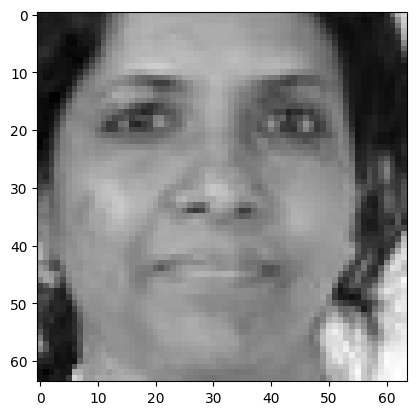

In [9]:
# Displaying an Image from the Dataset:

idx = 700
sample = images[idx]
print("Gender:",genders[idx],"Age:",ages[idx])
display(sample)

In [10]:
# Function for defining the Age Groups:

def age_group(age):
    if age >=0 and age < 18:
        return 1
    elif age < 30:
        return 2
    elif age < 80:
        return 3
    else:
        return 4

In [11]:
# Pre-processing:

target = np.zeros((size,2),dtype='float32')
features = np.zeros((size,sample.shape[0],sample.shape[1],1),dtype = 'float32')
for i in range(size):
    target[i,0] = age_group(int(ages[i])) / 4
    target[i,1] = int(genders[i])
    features[i] = images[i]

features = features / 255

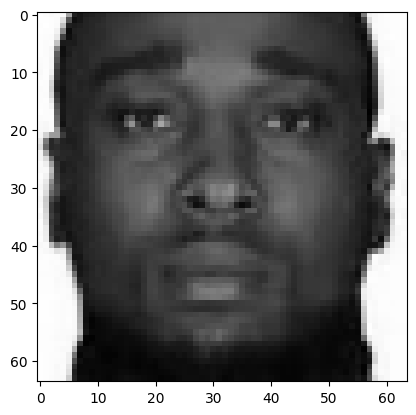

In [12]:
display(features[550])

In [13]:
# Splitting the Original Dataset into Training and Testing Dataset:

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2,shuffle  = True)
print("Samples in Training:",x_train.shape[0])
print("Samples in Testing:",x_test.shape[0])

Samples in Training: 18966
Samples in Testing: 4742


In [14]:
# Defining the Model Layers:

inputs = Input(shape=(64,64,1))
conv1 = Conv2D(32, kernel_size=(3, 3),activation='relu')(inputs)
conv2 = Conv2D(64, kernel_size=(3, 3),activation='relu')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(128, kernel_size=(3, 3),activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv3)
x = Dropout(0.25)(pool2)
flat = Flatten()(x)

dropout = Dropout(0.5)
age_model = Dense(128, activation='relu')(flat)
age_model = dropout(age_model)
age_model = Dense(64, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(32, activation='relu')(age_model)
age_model = dropout(age_model)
age_model = Dense(1, activation='relu')(age_model)

dropout = Dropout(0.5)
gender_model = Dense(128, activation='relu')(flat)
gender_model = dropout(gender_model)
gender_model = Dense(64, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(32, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(16, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(8, activation='relu')(gender_model)
gender_model = dropout(gender_model)
gender_model = Dense(1, activation='sigmoid')(gender_model)

In [15]:
# Compiling the Model:

model = Model(inputs=inputs, outputs=[age_model,gender_model])
model.compile(optimizer = 'adam', loss =['mse','binary_crossentropy'],metrics=['accuracy'])

In [16]:
# Summary of the Model:

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 62, 62, 32)           320       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 60, 60, 64)           18496     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

In [17]:
# Training the Model:

h = model.fit(x_train,[y_train[:,0],y_train[:,1]],validation_data=(x_test,[y_test[:,0],y_test[:,1]]),epochs = 40, batch_size=128,shuffle = True)

Epoch 1/40
149/149 [==============================] - 496s 3s/step - loss: 0.7849 - dense_3_loss: 0.0911 - dense_9_loss: 0.6938 - dense_3_accuracy: 0.0137 - dense_9_accuracy: 0.5173 - val_loss: 0.7220 - val_dense_3_loss: 0.0322 - val_dense_9_loss: 0.6898 - val_dense_3_accuracy: 0.0268 - val_dense_9_accuracy: 0.5247
Epoch 2/40
149/149 [==============================] - 493s 3s/step - loss: 0.7053 - dense_3_loss: 0.0450 - dense_9_loss: 0.6603 - dense_3_accuracy: 0.0216 - dense_9_accuracy: 0.5453 - val_loss: 0.5884 - val_dense_3_loss: 0.0262 - val_dense_9_loss: 0.5623 - val_dense_3_accuracy: 0.0266 - val_dense_9_accuracy: 0.7980
Epoch 3/40
149/149 [==============================] - 482s 3s/step - loss: 0.6276 - dense_3_loss: 0.0381 - dense_9_loss: 0.5895 - dense_3_accuracy: 0.0235 - dense_9_accuracy: 0.7314 - val_loss: 0.5130 - val_dense_3_loss: 0.0233 - val_dense_9_loss: 0.4897 - val_dense_3_accuracy: 0.0261 - val_dense_9_accuracy: 0.8264
Epoch 4/40
149/149 [=============================

In [18]:
# Saving the Model:

model.save('data.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


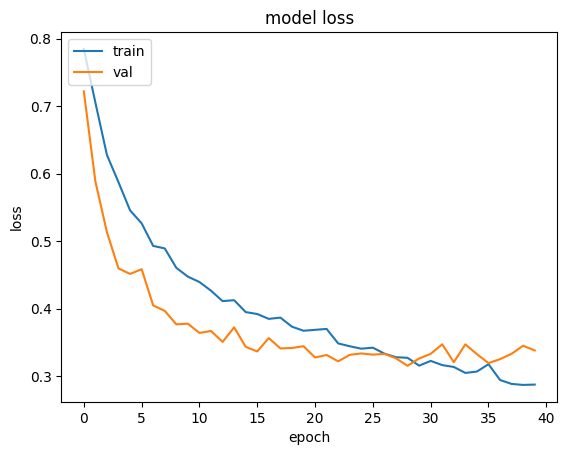

In [19]:
# Plotting the Training and the Validation Losses:

history = h
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [20]:
# Defining the functions for getting the Predictions:

def get_age(distr):
    distr = distr*4
    if distr >= 0.65 and distr <= 1.4:return "0-18"
    if distr >= 1.65 and distr <= 2.4:return "19-30"
    if distr >= 2.65 and distr <= 3.4:return "31-80"
    if distr >= 3.65 and distr <= 4.4:return "80 +"
    return "Unknown"

def get_gender(prob):
    if prob < 0.5:return "Male"
    else: return "Female"

def get_result(sample):
    sample = sample/255
    val = model.predict( np.array([ sample ]) )
    age = get_age(val[0])
    gender = get_gender(val[1])
    print("Values:",val,"\nPredicted Gender:",gender,"Predicted Age:",age)

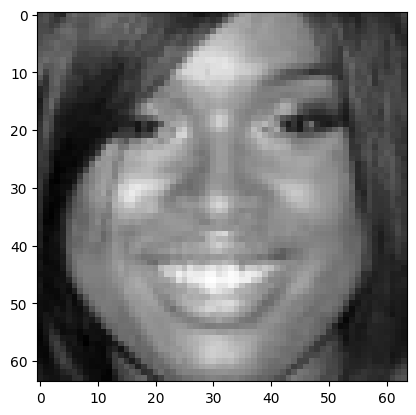

Actual Gender: Female Age: 40
1/1 [==============================] - 0s 31ms/step
Values: [array([[0.5725621]], dtype=float32), array([[0.8550396]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


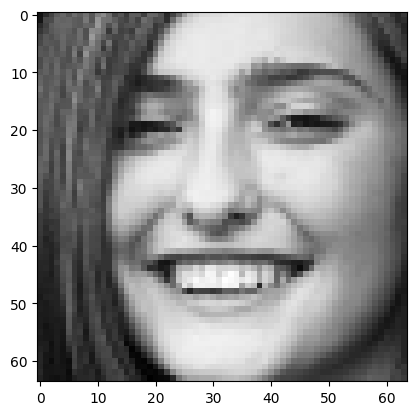

Actual Gender: Female Age: 15
1/1 [==============================] - 0s 29ms/step
Values: [array([[0.5830764]], dtype=float32), array([[0.85896254]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


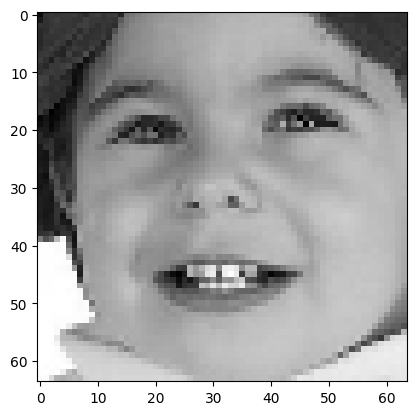

Actual Gender: Female Age: 4
1/1 [==============================] - 0s 47ms/step
Values: [array([[0.3432949]], dtype=float32), array([[0.8550396]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


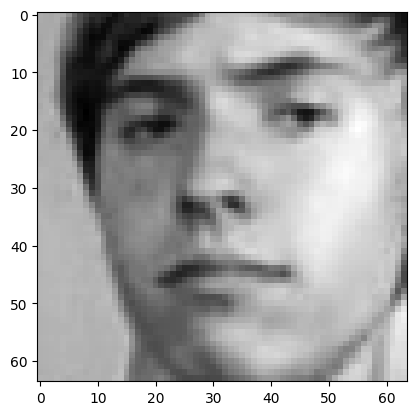

Actual Gender: Male Age: 18
1/1 [==============================] - 0s 44ms/step
Values: [array([[0.550072]], dtype=float32), array([[8.823185e-06]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


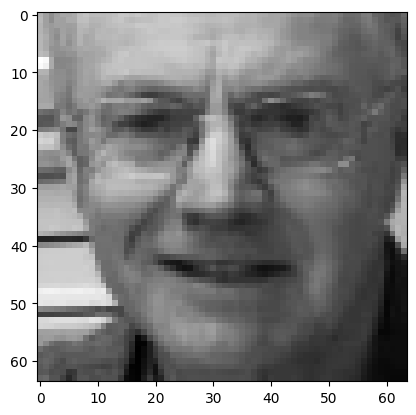

Actual Gender: Male Age: 58
1/1 [==============================] - 0s 43ms/step
Values: [array([[0.77850664]], dtype=float32), array([[0.00237018]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


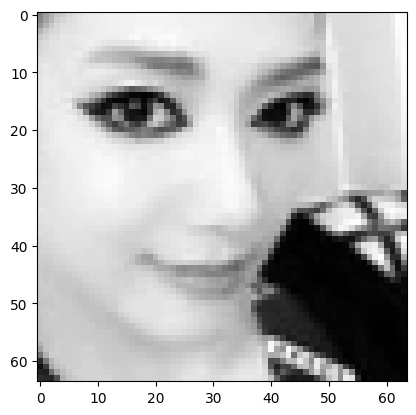

Actual Gender: Female Age: 27
1/1 [==============================] - 0s 56ms/step
Values: [array([[0.5522528]], dtype=float32), array([[0.85896254]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 19-30


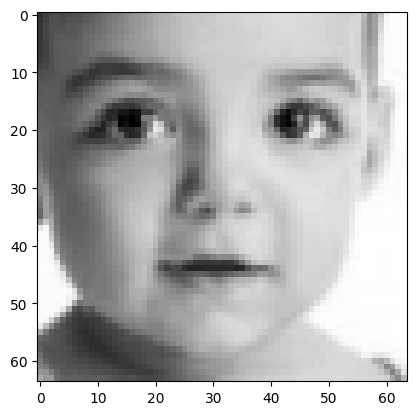

Actual Gender: Female Age: 3
1/1 [==============================] - 0s 44ms/step
Values: [array([[0.3228626]], dtype=float32), array([[0.8589228]], dtype=float32)] 
Predicted Gender: Female Predicted Age: 0-18


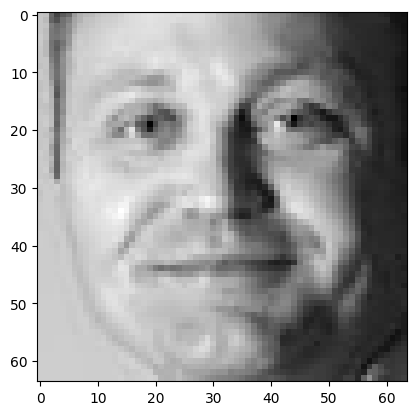

Actual Gender: Male Age: 40
1/1 [==============================] - 0s 30ms/step
Values: [array([[0.72046924]], dtype=float32), array([[0.32924506]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 31-80


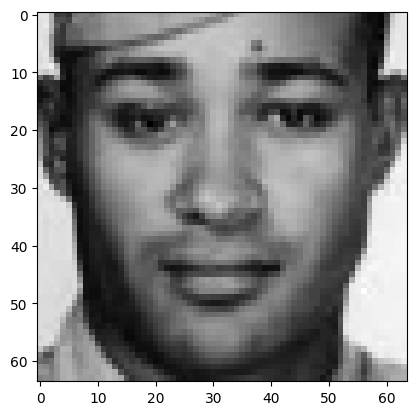

Actual Gender: Male Age: 24
1/1 [==============================] - 0s 29ms/step
Values: [array([[0.5591246]], dtype=float32), array([[0.00929107]], dtype=float32)] 
Predicted Gender: Male Predicted Age: 19-30


In [22]:
# Taking the predictions for a set of sample data points:

indexes = [500,59,80,2,4546,7,9,256,45]
for idx in indexes:
    sample = images[idx]
    display(sample)
    print("Actual Gender:",get_gender(genders[idx]),"Age:",ages[idx])
    res = get_result(sample)